`Aim:` *Notebook for the purpose of Climate Risk Assessment lecture:* `Advance Plotting`

`Author:` Mubashshir Ali

In [ ]:
import cartopy.crs as ccrs # for geographic plotting
import cartopy.feature as cfeature
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

sns.set(style='whitegrid')

##  Figure elements and Aesthetics 

In [2]:
Image(url="https://matplotlib.org/_images/sphx_glr_anatomy_001.png")

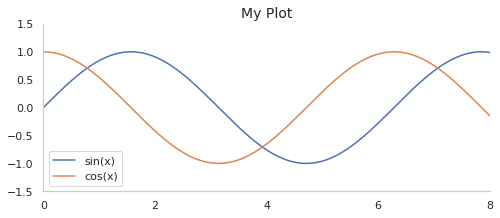

In [3]:
# customize our plot by controlling some figure elements

x = np.linspace(0, 10, 1000) 
y1 = np.sin(x) # our function
y2 = np.cos(x)

# lets create our canvas as we did above
fig = plt.figure(figsize=(8,8))
# adding axis. For multiple plots add another axis separately
ax = fig.add_subplot(1,1,1, aspect=1) # rows, columns, number

ax.plot(x, y1, label='sin(x)')
ax.plot(x, y2, label='cos(x)') 
ax.set_title('My Plot', fontsize=14)

# tweaking minor parameters to our liking
ax.set(xlim=(0,8), ylim=(-1.5,1.5), xticks=np.arange(0,8.1, 2))
ax.legend()
ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)
sns.despine(ax=ax)


In [4]:
sns.set(style='darkgrid', font_scale=1.5)

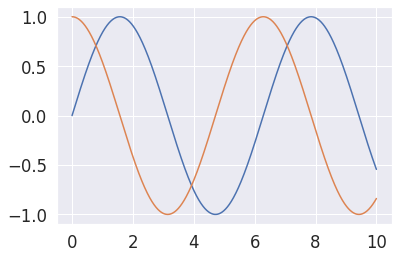

In [5]:
# customize our plot by controlling some figure elements

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))


[More examples on controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)

In [6]:
# changed to ticks
# I personally prefer it for geographic plotting
# feel free to play around
sns.set(style='ticks')

# Geographic ploting

So far we have seen plots in the Cartesian coordinate system(x-y). Python also provides powerful libraries such as `Cartopy` and `Basemap` to enable geographic ploting. In this class, we will use `Cartopy` library.

Let's import the libary as an alias

Let's plot a simple map

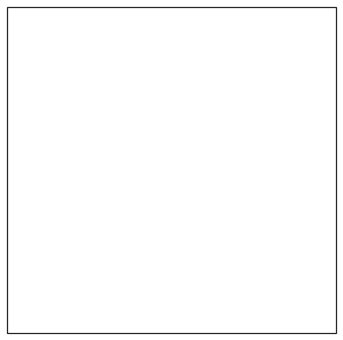

In [7]:
fig = plt.figure(figsize=[6,6])
# What are the units of the figure size? Try to find out.
#
# Geographic maps can have different projection system. 
# Now, we will specify that we want the axes of our figure in PlateCarree projection.
# We won't go into details of projection 
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([0, 90, -10, 70]) # setting the borders of our map

Oops! That doesn't look like the map we imagined. So, lets add ocean and land to our geograhical map. We can do that by calling `ax.add_feature()` .

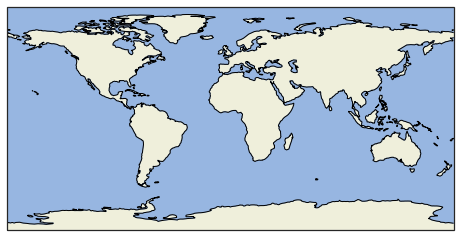

In [8]:
fig = plt.figure(figsize=[8,6])
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.set_global()

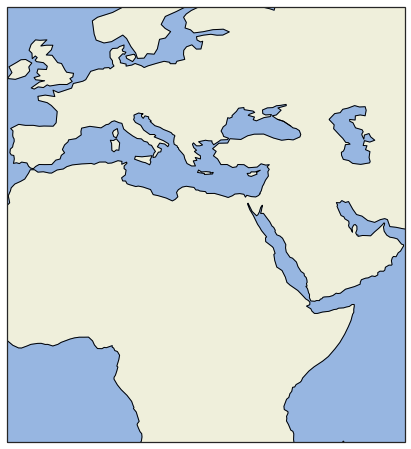

In [9]:
fig = plt.figure(figsize=[10,8])
ax = plt.axes(projection=ccrs.PlateCarree())
# with this we can zoom in by specyfing a smaller region
ax.set_extent([-10, 60, -10, 60]) # lon1, lon2 , lat1, lat2
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)


## Adding more features

We can also add features like country borders, rivers, lakes, etc.

Text(0.5, -0.1, 'longitude')

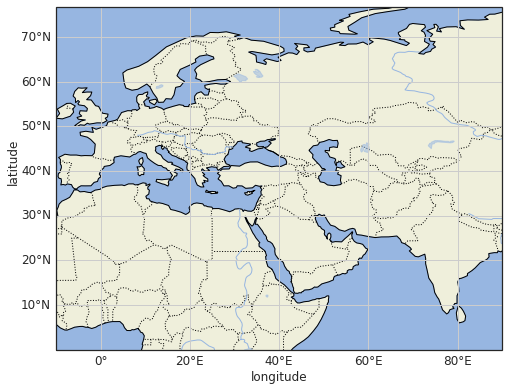

In [10]:
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 90, 0, 70]) 
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
gridlines = ax.gridlines(draw_labels=True, )
gridlines.top_labels=False
gridlines.right_labels=False

## Note: Normal labeling doesn't work as Cartopy's labeling takeover the matplotlib commands
# ax.set_xlabel('longitude')
# ax.set_ylabel('latitude')


# Here is a work around
ax.text(-0.08, 0.55, 'latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
ax.text(0.5, -0.1, 'longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)



### Drawing gridlines at only specific points and some additional gridline controls

In [11]:
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)

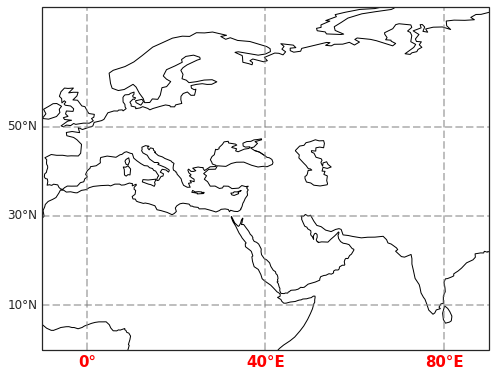

In [12]:
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-10, 90, 0, 70]) 
ax.add_feature(cfeature.COASTLINE)

gridlines = ax.gridlines(crs=ccrs.PlateCarree(), # projection info is needed if you plot in different projections
                                                # not needed for our use case
                         draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--'
                        )
gridlines.top_labels=False
gridlines.right_labels=False

gridlines.xlocator = mticker.FixedLocator([0, 40, 80])
gridlines.ylocator = mticker.FixedLocator([10, 30, 50])
gridlines.xformatter = LongitudeFormatter() # check out syntax using Contextual help for more info
gridlines.yformatter = LatitudeFormatter()
gridlines.xlabel_style = {'size': 15, 'color': 'red', 'weight': 'bold'}

## Plotting NetCDF file

In [13]:
# file to be plotted

file1 = '/climriskdata/EUR-11N/ICHEC-EC-EARTH_SMHI-RCA4_v1/rcp85/tas/reduced_tas_EUR-11_ICHEC-EC-EARTH_rcp85_r12i1p1_SMHI-RCA4_v1_day_20710101-20751231_LL.nc'
# lets load the data by using open_dataset function of xarray
ds1 = xr.open_dataset(file1)

### Quick Recap 

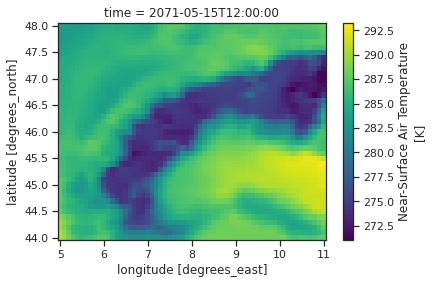

In [14]:

data_to_plot = ds1.tas.sel(time='2071-05-15 12:00')
data_to_plot.plot()

Most of the time we need more control to make plots for publication quality. So, now we're going to have a look as to how we can control more aspects of our plot rather than letting `xarray` do it for us. We will try to stick with `xarray's` easy plotting method as much as possible that means, letting it choose most of the things for us. But, we will add more details wherever required to make the plot fit to our needs.

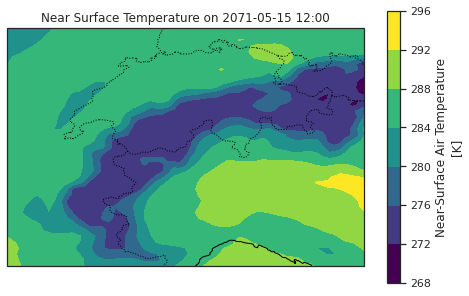

In [15]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

# now we're going to tell xarray that we want contourf plot specifically!

data_to_plot.plot.contourf(ax=ax, transform=ccrs.PlateCarree())
# transform means we're telling projection of our data to cartopy, not important at this stage
# data we use here is by default in PlateCarree(lat, lon)

# setting the title

ax.set_title('Near Surface Temperature on 2071-05-15 12:00');


[More colour-bars options](https://matplotlib.org/users/colormaps.html)

## Levels

Lets say we want to see minute temperature variations and thus, we would like to divide our color bar into smaller segments. For that one could just use `levels` arguments. Of course, one can also make there own custom segments and specify it as a list.

In [16]:
# fixing default time values
dt = pd.to_datetime(data_to_plot.time.data)
nice_time = dt.strftime('%d-%m-%Y %H:%M')

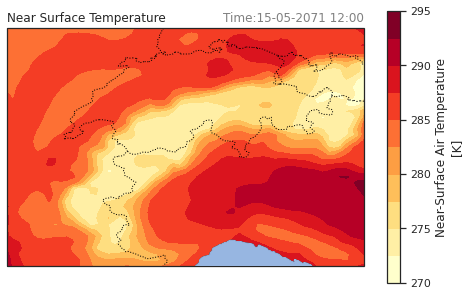

In [17]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection=ccrs.PlateCarree())

# setting geographical boundaries of our map using the data provided
ax.set_extent([5,11, 44, 48])
## Note: so far xarray was setting geographical boundaries on its own but we can also specify the boundaries manually

ax.add_feature(cfeature.COASTLINE, linestyle='-')
ax.add_feature(cfeature.BORDERS, linestyle=':')

data_to_plot.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='YlOrRd', levels=10) # added levels argument

# Adding ocean so that we only emphasize on Land
ax.add_feature(cfeature.OCEAN, zorder=10) 

ax.set_title('')
ax.set_title('Near Surface Temperature', loc='left', fontsize=12);
ax.set_title('Time:{}'.format(nice_time), loc='right', fontsize=12, color='grey');


### making custom levels

As mentioned above, we can also define custom levels for our color-bar

In [18]:
# Irregular levels to illustrate the use of a proportional colorbar spacing
levels1 = [230, 250, 260, 270, 275, 280, 284, 288, 290, 292, 294]

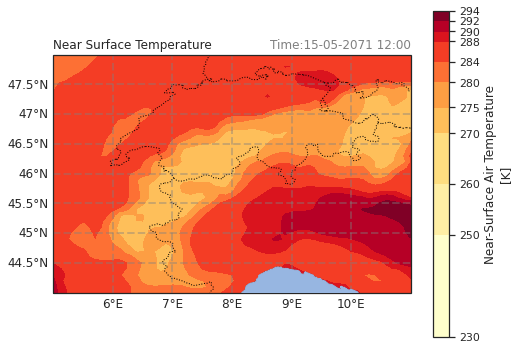

In [20]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linestyle=':')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, zorder=10)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.4, linestyle='--')
gl.top_labels = False # suppress gridline labels on the top
gl.right_labels = False # suppress gridline labels at the right edge

data_to_plot.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='YlOrRd', 
                           levels=levels1, 
                           # using cbar_kwargs one can control properties of color bar
                           cbar_kwargs={'ticks':levels1,'spacing': 'proportional',
                                       #'shrink':0.8
                                       }
                           # add shrink and see the difference
                             )

ax.set_title('')
ax.set_title('Near Surface Temperature', loc='left', fontsize=12);
ax.set_title('Time:{}'.format(nice_time), loc='right', fontsize=12, color='grey');

## Plotting Contours

Contours are lines representing points with a common numerical value.

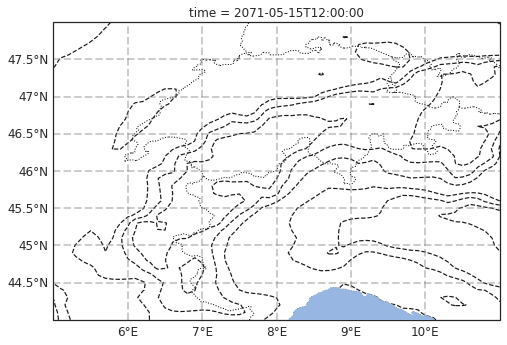

In [21]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE, linestyle=':')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.OCEAN, zorder=10)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.4, linestyle='--')
gl.top_labels = False # suppress gridline labels on the top
gl.right_labels = False # suppress gridline labels at the right edge

data_to_plot.plot.contour(ax=ax, transform=ccrs.PlateCarree(), 
                           levels=levels1, colors='k', linestyles='dashed',
                          linewidths=1.2,
                          )




`Homework:` Find out different `linestyles` options.

**Take home message:** 
* For non geographical plotting we use `matplotlib` library which produces high quality scientific plots.
* For geographic plotting we add `cartopy` to our `matplotlib` plots to take care of geographical axis and map projections.
* For quick geographical plotting, use high-level plotting features of `xarray`. 
* For absolute control of your geographical plots use `cartopy` directly.

# Plotting multiple files using for loop

In [ ]:
# list of all files in the sub-directory sorted according to file name
all_files=['path/to/file1.nc', 'path/to/file2.nc', 'path/to/file3.nc',]
save_names=['plot1', 'plot2', 'plot3']

# loop over all files
for i in range(len(all_files)):
    # open file
    ds = xr.open_dataset(all_files[i])
  
  
    # paste your plotting routine below #
    
    
    
    plt.savefig('/save/to/my_directory/'+ save_names[i] +'.png', dpi=100, bbox_inches='tight' )
    plt.close() # make sure not to crash the notebook by keeping 20-30 plots open 
    print('Finished plotting for {}'.format(all_files[i]))

# Making Subplots


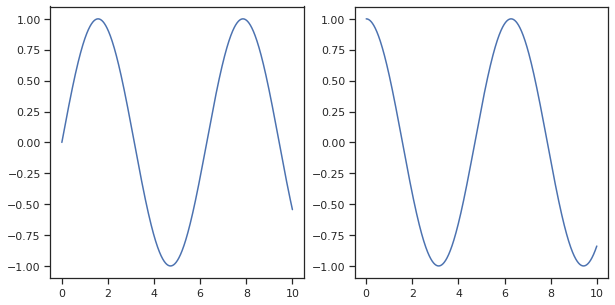

In [41]:
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
x = np.linspace(0, 10, 1000) 
y1 = np.sin(x) # our function
y2 = np.cos(x)
ax1.plot(x, y1)
ax2.plot(x, y2)

## Geographic subplots

In [4]:
data_list = [ds1.tas.isel(time=0), ds1.tas.isel(time=1), ds1.tas.isel(time=-2), ds1.tas.isel(time=-1)]

In [50]:
len(data_list)

4

In [51]:
data_list[0]

<xarray.DataArray 'tas' (lat: 41, lon: 61)>
array([[282.3606 , 281.92233, 281.38867, ..., 281.33218, 281.44113, 281.81854],
       [282.17743, 281.61105, 280.8188 , ..., 280.02493, 280.3555 , 280.87204],
       [281.76346, 281.17737, 280.14703, ..., 280.2751 , 280.7882 , 281.293  ],
       ...,
       [279.64423, 279.542  , 279.47067, ..., 279.77545, 279.8155 , 279.86526],
       [279.83334, 279.6843 , 279.56104, ..., 279.0776 , 279.01532, 278.93643],
       [279.9746 , 279.82288, 279.6683 , ..., 278.4002 , 278.3426 , 278.20987]],
      dtype=float32)
Coordinates:
    time     datetime64[ns] 2071-01-01T12:00:00
  * lon      (lon) float64 5.0 5.1 5.2 5.3 5.4 5.5 ... 10.6 10.7 10.8 10.9 11.0
  * lat      (lat) float64 44.0 44.1 44.2 44.3 44.4 ... 47.6 47.7 47.8 47.9 48.0
Attributes:
    standard_name:  air_temperature
    long_name:      Near-Surface Air Temperature
    units:          K
    cell_methods:   time: mean

In [6]:
mean_temp=ds1.tas.mean()

In [7]:
mean_temp

<xarray.DataArray 'tas' ()>
array(281.4577, dtype=float32)

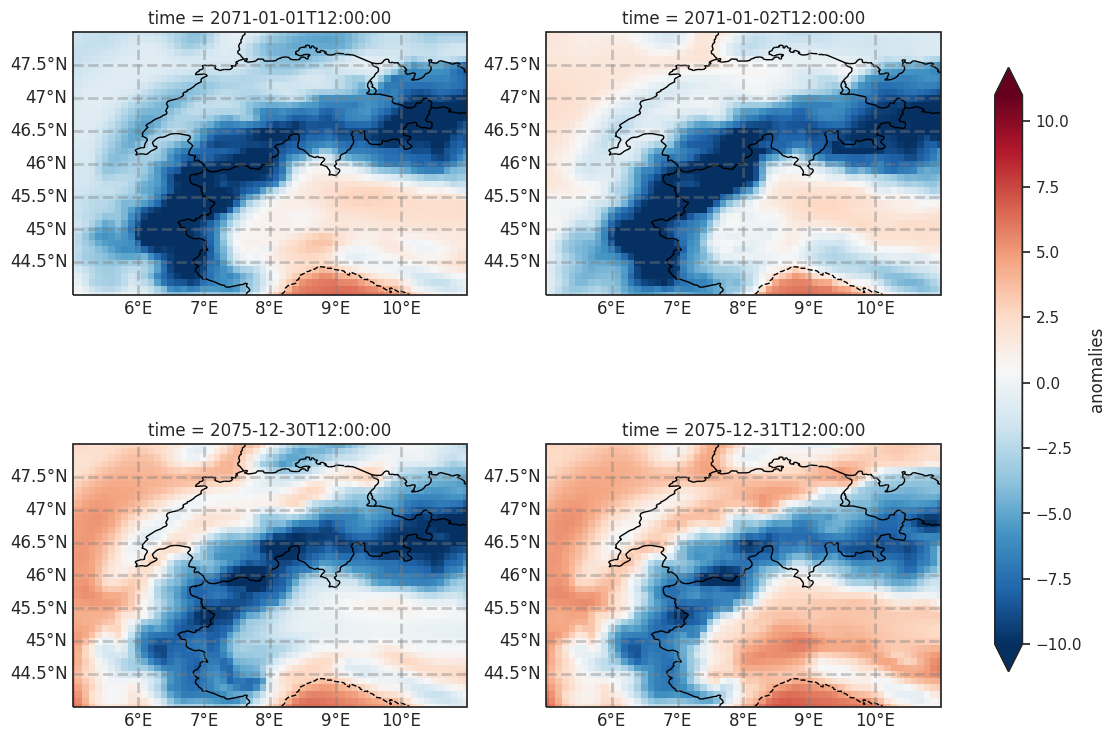

In [10]:
projection=ccrs.PlateCarree()
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(14,10),  dpi=100, 
                                         subplot_kw=dict(projection=ccrs.PlateCarree())
                                        )

for ax, data in zip(axes.flat, data_list):
    p = (data - mean_temp).plot.pcolormesh(ax=ax, cmap='RdBu_r', vmin=-10, vmax=11,
                                                           add_colorbar=False)
# Note: vmin, vmax is very important so that colorbar is consistent for all subplots
# Or you can give custom levels
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.4, linestyle='--')
    gl.top_labels= False # suppress gridline labels on the top
    gl.right_labels = False # suppress gridline labels at the right edge
    ax.set_extent([5,11, 44, 48])
    ax.coastlines(linestyles='dashed')
    ax.add_feature(cfeature.BORDERS)
    

# if you don't like the default spacing between subplots you can control the finer settings with plt.subplots_adjust()
# plt.subplots_adjust(wspace = 0.3,  # the amount of width reserved for space between subplots,
                   # right = 0.8,   # the right side of the subplots of the figure
              # expressed as a fraction of the average axis width
#                    hspace = 0.0  # the amount of height reserved for space between subplots,
              # expressed as a fraction of the average axis height
#                   )   
plt.colorbar(p, ax=axes.flat, shrink=0.8, extend='both', label="Anomalies", 
            orientation='vertical');

# uncomment to save 
# change file extension to ".jpg" or ".png" as per need
#plt.savefig('/my_dir/save_my_plot.pdf', dpi=300, bbox_inches='tight',
#        pad_inches=0.05)

_Note_ : Adding common colorbar with [this method is more precise](https://stackoverflow.com/a/13784887/7763326) in the sense that one creates a specific colorbar axes with height,width and location info to place the colorbar but the above solution we used is more general . In any case, I had to play with figure `size` and cbar `shrink` to get it right.